In [1]:
from wgangp.db_utils import *
from acf_utils import *
from utility import *
import scipy.ndimage as ff
import stats

plt.rcParams['font.size'] = 24
#plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['legend.fontsize'] = 17
plt.rcParams['figure.dpi'] = 60
plt.rcParams['legend.markerscale'] = 2

/usr/local/tensorflow/1.14-0/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/tensorflow/1.14-0/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/tensorflow/1.14-0/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/tensorflow/1.14-0/lib/python3.6/site-packages/tensorf

In [2]:
GAN = 'wgangp'
DB_NAME = 'lagrangian'
run = 51
number = 1750

In [3]:
path = f'/scratch/scarpolini/'+DB_NAME+'/'+GAN+f'/runs/{run}/{number}_gen.h5'
gen = load_model(path)

W0922 15:59:43.040662 47338031164928 deprecation.py:506] From /usr/local/tensorflow/1.14-0/lib/python3.6/site-packages/tensorflow/python/keras/initializers.py:143: calling RandomNormal.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0922 15:59:43.042866 47338031164928 deprecation.py:506] From /usr/local/tensorflow/1.14-0/lib/python3.6/site-packages/tensorflow/python/ops/init_ops.py:97: calling Zeros.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0922 15:59:43.084179 47338031164928 deprecation.py:506] From /usr/local/tensorflow/1.14-0/lib/python3.6/site-packages/tensorflow/python/ops/init_ops.py:97: calling Ones.__init__ (fr

In [11]:
z = np.random.normal(0,1,size=(1000,100))
traj = gen.predict(z)
sigma = 0.5

input1 = gen.input               # input placeholder
output1 = [layer.output for layer in gen.layers]# all layer outputs
all_hidden_outputs = K.function([input1, K.learning_phase()],output1)# evaluation function

def output_from_intermediate_input(input_index, output_index):
    input1 = gen.layers[input_index].input
    output1 = gen.layers[output_index].output
    res = K.function([input1, K.learning_phase()],output1)
    return res


layer_outputs = all_hidden_outputs([z, 0])


##.  initial_output_index = 8
##.  in_indexes = [9,12,15]
##.  out_indexes = [11,14,17]
##.  
##.  mod_output = [ff.gaussian_filter1d(
##.          layer_outputs[initial_output_index],
##.          sigma=sigma,
##.          mode='nearest',
##.          axis=1)]
##.  
##.  
##.  ## QUI SMOOTHO I CANALI IN USCITA DAI VARI LAYER DEL GENERATORE PRIMA DI
##.  ## REIMMETTERLI NEI LAYER SUCCESSIVI. IN QUESTO MODO MAGARI LO SMOOTHING È
##.  ## MENO INVASIVO IN QUANTO POSSO USARE SIGMA PIÙ PICCOLO, DILUITO SU VARI
##.  ## LAYER
##.  
##.  for i in range(len(in_indexes)):
##.      next_input = mod_output[-1]
##.      output = output_from_intermediate_input(in_indexes[i], out_indexes[i])(
##.          [next_input, 0])
##.      
##.      if i == len(in_indexes) - 1:
##.          mod_output.append(output)
##.      else :
##.          mod_output.append(ff.gaussian_filter1d(
##.              output,
##.              sigma=sigma,
##.              mode='nearest',
##.              axis=1))
    
    
    

In [12]:
for ii, output in enumerate(layer_outputs):
    np.save(f'lay_outs/{ii}_hid_layers_outputs', output)

In [2]:
plt.figure(figsize=(20,10))
plt.plot(traj[:,:,0].T)
plt.plot(mod_output[-1][:,:,0,0].T)
#plt.xlim([1000,1300])
#plt.ylim([-0.4,0.4])

NameError: name 'plt' is not defined

In [10]:
for i in range(len(layer_outputs)):
    print(i, layer_outputs[i].shape, gen.layers[i].name)
    
#gen.summary()

0 (50000, 3200) dense
1 (50000, 3200) re_lu
2 (50000, 25, 1, 128) reshape
3 (50000, 25, 1, 128) batch_normalization
4 (50000, 125, 1, 64) conv2d_transpose
5 (50000, 125, 1, 64) re_lu_1
6 (50000, 125, 1, 64) batch_normalization_1
7 (50000, 250, 1, 32) conv2d_transpose_1
8 (50000, 250, 1, 32) re_lu_2
9 (50000, 250, 1, 32) batch_normalization_2
10 (50000, 500, 1, 16) conv2d_transpose_2
11 (50000, 500, 1, 16) re_lu_3
12 (50000, 500, 1, 16) batch_normalization_3
13 (50000, 1000, 1, 8) conv2d_transpose_3
14 (50000, 1000, 1, 8) re_lu_4
15 (50000, 1000, 1, 8) batch_normalization_4
16 (50000, 2000, 1, 1) conv2d_transpose_4
17 (50000, 2000, 1, 1) activation
18 (50000, 2000, 1) reshape_1


In [1]:
position = 'neuron'
mod = False
out_indexes.insert(0,initial_output_index)

if GAN == 'wgangp2048' :
    neurons_indexes = [2,6,9,12,15,17]
    conv_indexes = [0,4,7,10,13,16]
    norm_indexes = [1,5,8,11,14]
elif GAN == 'wgangp' :
    neurons_indexes = [1,5,8,11,14,17]
    conv_indexes = [0,4,7,10,13,16]
    norm_indexes = [3,6,9,12,15]
i = slice(0,5) ## indice del filtro
j = 4          ## indice del layer
if position == 'neuron':
    indexes = neurons_indexes
elif position == 'conv':
    indexes = conv_indexes
elif position == 'norm':
    indexes = norm_indexes
plt.rcParams['figure.figsize'] = (20, 8*len(indexes))
labels = []
if position == 'neuron':
    for jj in range(len(indexes)):
        if jj==0: labels.append('ReLU(fully connected)')
        else:
            labels.append('ReLU(conv_'+str(jj)+')')
elif position == 'conv':
    for jj in range(len(indexes)):
        if jj==0: labels.append('dense')
        else:
            labels.append('conv_'+str(jj))
elif position == 'norm':
    for jj in range(len(indexes)):
        labels.append('norm(ReLU_'+str(jj)+')')


fig, ax = plt.subplots(len(indexes),1)
if position == 'norm':
    for jj, j in enumerate(indexes):
        ax[jj].plot(layer_outputs[j][0,:,0,i])
        ax[jj].text(0.75,0.9,labels[jj], transform=ax[jj].transAxes)
else:
    for jj, j in enumerate(indexes):
        if jj==0:
            ax[jj].plot(layer_outputs[j][0,:])
            ax[jj].text(0.75,0.9,labels[jj], transform=ax[jj].transAxes)
        else:
            if mod and (j in out_indexes):
                ax[jj].plot(mod_output[out_indexes.index(j)][0,:,0,i])
                #ax[jj].plot(layer_outputs[j][0,:,0,i])
                ax[jj].text(0.75,0.9,labels[jj]+' mod', transform=ax[jj].transAxes)
            else:
                ax[jj].plot(layer_outputs[j][0,:,0,i])
                ax[jj].text(0.75,0.9,labels[jj], transform=ax[jj].transAxes)

NameError: name 'out_indexes' is not defined

## Ora provo a mostrare le pdf degli output ad ogni layer

In [475]:
z = np.random.normal(0,1,size=(50000,100))
layer_outputs = all_hidden_outputs([z, 0])

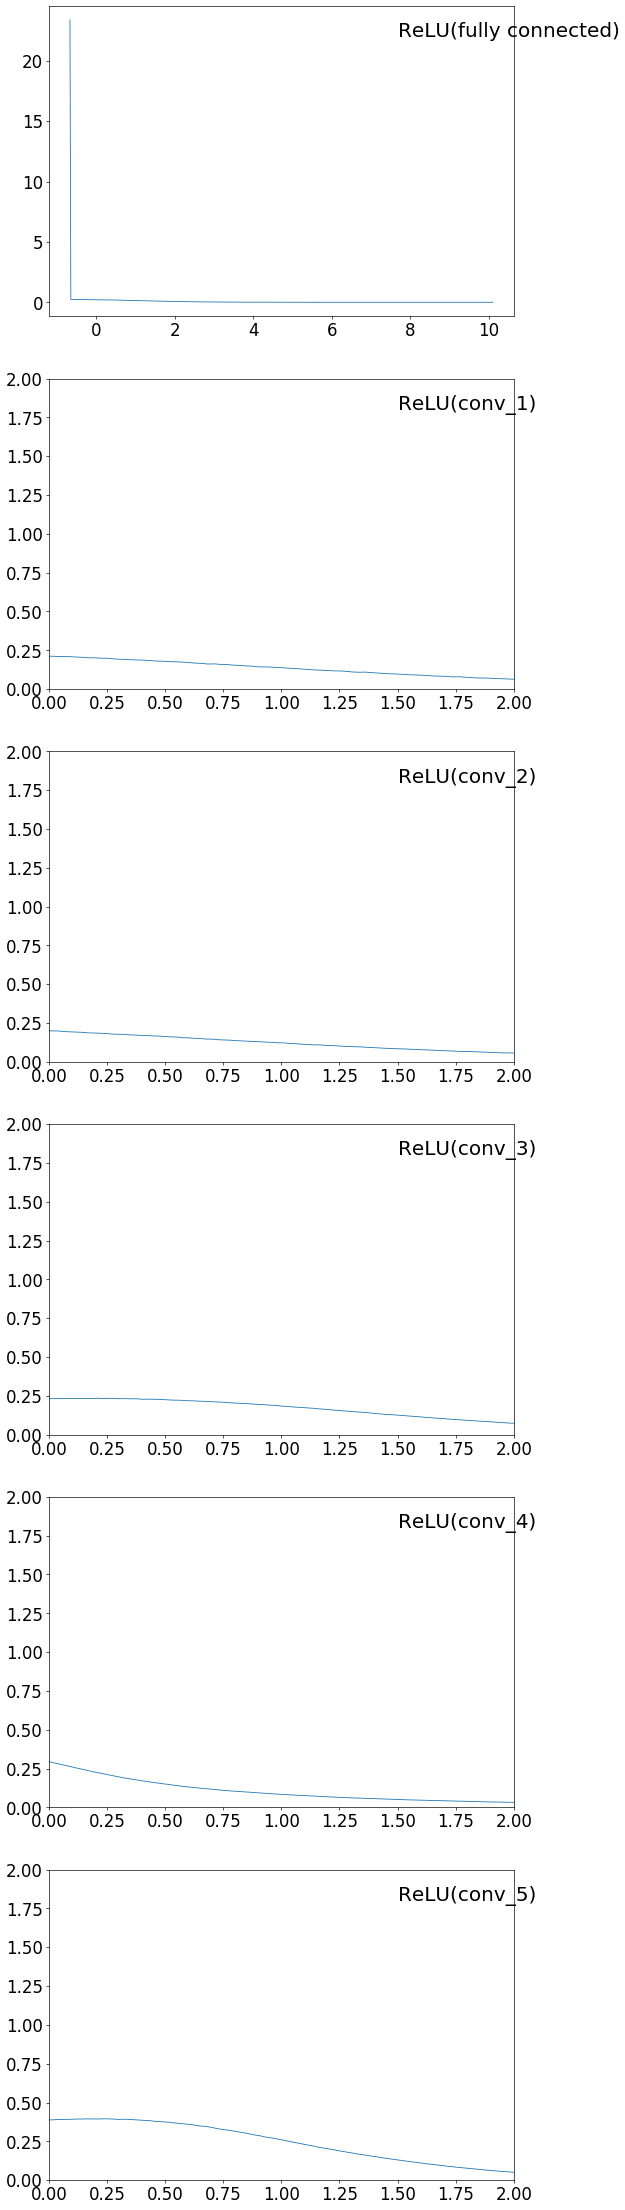

In [497]:
position = 'neuron'
histop={'bins':500, 'std':True}
out_indexes.insert(0,initial_output_index)

if GAN == 'wgangp2048' :
    neurons_indexes = [2,6,9,12,15,17]
    conv_indexes = [0,4,7,10,13,16]
    norm_indexes = [1,5,8,11,14]
elif GAN == 'wgangp' :
    neurons_indexes = [1,5,8,11,14,17]
    conv_indexes = [0,4,7,10,13,16]
    norm_indexes = [3,6,9,12,15]
i = 0 ## indice del filtro
j = 4          ## indice del layer
if position == 'neuron':
    indexes = neurons_indexes
elif position == 'conv':
    indexes = conv_indexes
elif position == 'norm':
    indexes = norm_indexes
plt.rcParams['figure.figsize'] = (10, 8*len(indexes))
labels = []
if position == 'neuron':
    for jj in range(len(indexes)):
        if jj==0: labels.append('ReLU(fully connected)')
        else:
            labels.append('ReLU(conv_'+str(jj)+')')
elif position == 'conv':
    for jj in range(len(indexes)):
        if jj==0: labels.append('dense')
        else:
            labels.append('conv_'+str(jj))
elif position == 'norm':
    for jj in range(len(indexes)):
        labels.append('norm(ReLU_'+str(jj)+')')


fig, ax = plt.subplots(len(indexes),1)
if position == 'norm':
    for jj, j in enumerate(indexes):
        ax[jj].plot(layer_outputs[j][0,:,0,i])
        ax[jj].text(0.75,0.9,labels[jj], transform=ax[jj].transAxes)
else:
    for jj, j in enumerate(indexes):
        if jj==0:
            pdf = stats.make_hist(layer_outputs[j][:,:],**histop)
            ax[jj].plot(*(pdf))
            ax[jj].text(0.75,0.9,labels[jj], transform=ax[jj].transAxes)
        else:
                pdf = stats.make_hist(layer_outputs[j][:,:,0,i],**histop)
                ax[jj].plot(*(pdf))
                #ax[jj].set_xscale('log')
                ax[jj].set_xlim([0,2])
                ax[jj].set_ylim([0,2])
                ax[jj].text(0.75,0.9,labels[jj], transform=ax[jj].transAxes)